In [1]:
#Rudimentary analysis on detected POCs including testing the striping method, area histogram, time distribution and some ISCCP data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import pickle

In [2]:
#import data
# poc_database = joblib.load('/Users/watson-parris/Local Data/POC_data/POC_database_2.dat')
# poc_images = np.load('MODIS_Sc_scenes/numpy_arrays/POC_only_numpy_images.npy')
# poc_masks = np.load('MODIS_Sc_scenes/numpy_arrays/POC_only_masks.npy')

In [12]:


from sklearn.externals import joblib
poc_database = joblib.load('/Users/watson-parris/Local Data/POC_data/POC_database_2.dat')
indices = []
filename_index = 0
filenames = {}
filenames_list = []
for filename, value in poc_database.items():
    filenames[filename] = filename_index
    filenames_list.append(filename)
    for poc in range(value['poc_no']):
        indices.append((filename_index,poc))
    filename_index += 1

index = pd.MultiIndex.from_tuples(indices, names=['Image', 'POC'])
# columns = ['Poc Score', 'Area', 'Perimeter', 'Region']
columns = {'float32': 'Poc Score', 'float32':'Area', 'float32':'Perimeter', "string":'Region'}
poc_data = pd.DataFrame(index=index, columns=columns)

regions = ['California', "Namibia", "Peru"]

def get_region(f):

    for region in regions:
        if region.lower() in f:
            return region
    print(f)
    raise ValueError("Unkown region")

for filename, value in poc_database.items():
    for poc in range(value['poc_no']):
        poc_data.at[(filenames[filename], poc), 'Poc Score'] = value['poc_data'][poc]['poc_score']
        poc_data.at[(filenames[filename], poc), 'Area'] = value['poc_data'][poc]['area']
        poc_data.at[(filenames[filename], poc), 'Perimeter'] = value['poc_data'][poc]['perimeter']
        poc_data.at[(filenames[filename], poc), 'Region'] = get_region(filename)

# poc_data = load_poc_database()

In [13]:
poc_data

float32 string  Poc Score     Area   Perimeter      Region
Image POC                                                           
0     0       NaN    NaN   0.326486   8823.5  408.717817  California
      1       NaN    NaN   0.283142   3108.5  271.923880  California
1     0       NaN    NaN   0.239150   3528.0  243.882250  California
      1       NaN    NaN   0.238492   6601.5  454.717817  California
      2       NaN    NaN   0.028427    253.5   68.870057  California
...           ...    ...        ...      ...         ...         ...
4726  3       NaN    NaN   0.253750   2868.0  281.681239        Peru
      4       NaN    NaN   0.459085   7284.5  367.379724        Peru
4727  0       NaN    NaN   0.340845  23830.0  740.676187        Peru
      1       NaN    NaN   0.282929   8472.0  471.279218        Peru
4728  0       NaN    NaN   0.386173   6450.5  367.521859        Peru

[8614 rows x 6 columns]

In [5]:
# print(len(filenames_list))
#print(filenames_list)

In [6]:
# import pickle
# with open('MODIS_Sc_scenes/numpy_arrays/POC_filenames.dat', 'rb') as f:
#         POC_filenames = pickle.load(f)
# with open('MODIS_Sc_scenes/numpy_arrays/poc_filenames.dat', 'rb') as f:
#         poc_filenames = pickle.load(f)
# with open('MODIS_Sc_scenes/numpy_arrays/filename_list', 'rb') as f:
#         filename_list = pickle.load(f)
        
# print(len(POC_filenames))
# print(len(poc_filenames))
# print(len(filename_list))

In [7]:
# full_size_poc_masks = np.load('MODIS_Sc_scenes/numpy_arrays/full_size_POC_only_masks.npy')
# print(full_size_poc_masks.shape)
# del full_size_poc_masks

In [8]:
#, dtype=['float32', 'float32', 'float32', 'string'])

In [9]:
poc_data.dtypes

float32       object
string        object
Poc Score    float64
Area         float64
Perimeter    float64
Region        object
dtype: object

# POC area distributions

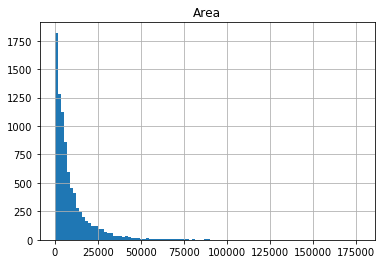

In [10]:
hist = poc_data.hist(bins=100, column='Area')

In [11]:
poc_data_reduced = poc_data[np.logical_and(poc_data['Poc Score'] > 0, poc_data['Poc Score'] < 1)]
poc_data_reduced = poc_data_reduced[poc_data_reduced['Area'] < 75000]
poc_data_reduced = poc_data_reduced[poc_data_reduced['Area'] > 1000]
#poc_data_reduced = poc_data
print(poc_data_reduced)

          float32 string  Poc Score     Area    Perimeter      Region
Image POC                                                            
0     0       NaN    NaN   0.326486   8823.5   408.717817  California
      1       NaN    NaN   0.283142   3108.5   271.923880  California
1     0       NaN    NaN   0.239150   3528.0   243.882250  California
      1       NaN    NaN   0.238492   6601.5   454.717817  California
      5       NaN    NaN   0.149041   4325.0   291.823375  California
2     0       NaN    NaN   0.313914   4012.0   279.421354  California
3     0       NaN    NaN   0.282170   2197.5   219.095453  California
4     0       NaN    NaN   0.411837   6039.0   390.534052  California
5     0       NaN    NaN   0.400517  24046.0   786.499562  California
6     0       NaN    NaN   0.336920  17841.5   772.457932  California
7     0       NaN    NaN   0.346631   3186.0   231.882250  California
8     0       NaN    NaN   0.188461   3831.0   348.225396  California
9     0       NaN   

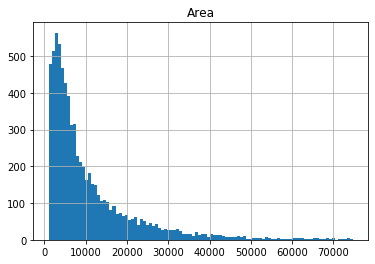

In [12]:
fig, ax = plt.subplots()
hist = poc_data_reduced.hist(ax=ax, bins=100, column='Area')

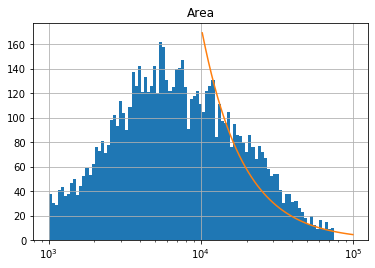

In [13]:
fig, ax = plt.subplots()
x=np.logspace(3, 5, num=100)

hist = poc_data_reduced.hist(ax=ax, column='Area', bins=x)

# ax.plot(x, 1e4*(x/800)**-1.6)
ax.plot(x[50:], 1e4*(x[50:]/800)**-1.6)
ax.set_xscale('log')
# ax.set_yscale('log')

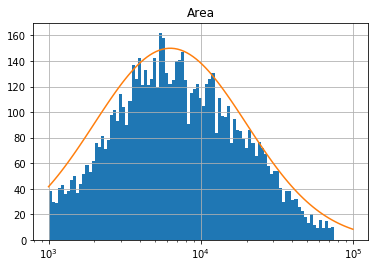

In [14]:
fig, ax = plt.subplots()
x=np.logspace(3, 5, num=100)

hist = poc_data_reduced.hist(ax=ax, column='Area', bins=x)

# ax.plot(x, 1e4*(x/800)**-1.6)
ax.plot(x, 300*np.exp(((-(np.log10(x)-3.8)**2)/2*2**2))/2)
ax.set_xscale('log')
# ax.set_yscale('log')

(3.847698396597505, 0.4031885915032473)


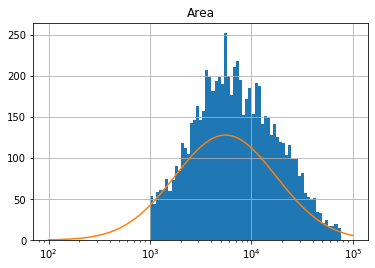

In [15]:
import scipy.stats
params = scipy.stats.norm.fit(np.log10(poc_data_reduced['Area']), loc=poc_data_reduced['Area'].median(), scale=0.5)
print(params)

fig, ax = plt.subplots()
x=np.logspace(2, 5, num=100)

hist = poc_data_reduced.hist(ax=ax, column='Area', bins=x)

# ax.plot(x, 180*scipy.stats.norm.pdf(np.log10(x), *params))
# ax.plot(x, 180*scipy.stats.lognorm.pdf(x, 10, 3900, 1))
ax.plot(x, 160*scipy.stats.norm.pdf(np.log10(x), np.log10(5544.0), 0.5))
ax.set_xscale('log')
# ax.set_yscale('log')

(3.847698396597505, 0.4031885915032473)


/Users/watson-parris/miniconda3/envs/xarray/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


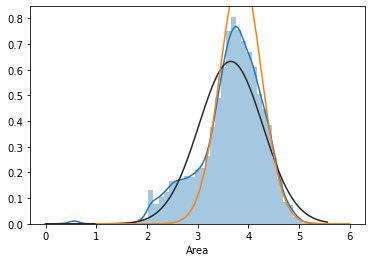

In [16]:
import seaborn as sns
params = scipy.stats.norm.fit(np.log10(poc_data_reduced['Area']), loc=poc_data_reduced['Area'].median(), scale=0.5)
print(params)

fig, ax = plt.subplots()
# x=np.logspace(3, 5, num=100)
x=np.linspace(1, 6)

hist = sns.distplot(np.log10(poc_data['Area']), ax=ax, bins=x, fit=scipy.stats.norm)
# hist = sns.distplot(np.log10(poc_data_reduced['Area']), ax=ax, fit=scipy.stats.norm)

ax.plot(x, scipy.stats.norm.pdf(x, *params))
# ax.plot(x, 180*scipy.stats.lognorm.pdf(x, 10, 3900, 1))
# ax.plot(x, 160*scipy.stats.norm.pdf(np.log10(x), np.log10(5544.0), 0.5))
# ax.set_xscale('log')
# ax.set_yscale('log')

/Users/watson-parris/miniconda3/envs/xarray/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


6753.75 354.8133892335753


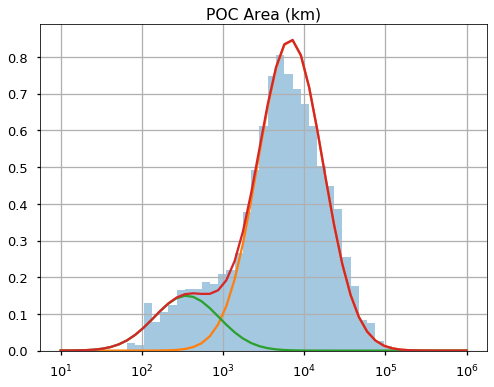

In [17]:

sns.set_context('talk')
fig, ax = plt.subplots(figsize=(8,6))
x=np.linspace(1, 6)

hist = sns.distplot(np.log10(poc_data['Area']), ax=ax, bins=x, kde=False, norm_hist=True)

y1_mu = poc_data_reduced['Area'].median()
y2_mu = 10**2.55
print(y1_mu, y2_mu)

y1 = 0.85*scipy.stats.norm.pdf(x, np.log10(y1_mu), 0.4)
y2 = 0.15*scipy.stats.norm.pdf(x, np.log10(y2_mu), 0.4)
ax.plot(x, y1)
ax.plot(x, y2)
ax.plot(x, y1+y2)
ax.grid()
ax.set_xticklabels([f"$10^{int(t)}$" for t in ax.get_xticks()])
_=ax.set_xlabel('')
_=ax.set_title('POC Area (km)')

NameError: name 'regions' is not defined

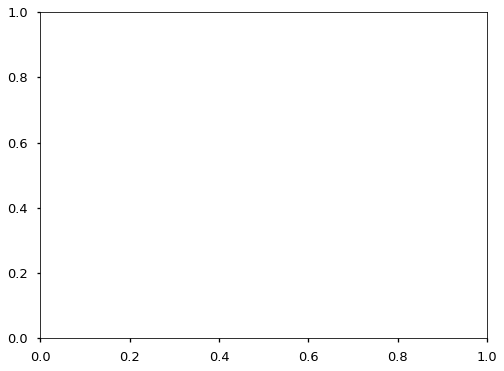

In [18]:
fig, ax = plt.subplots(figsize=(8,6))
x=np.linspace(1, 6)

for r in regions:
    hist = sns.kdeplot(np.log10(poc_data[poc_data.Region==r]['Area']), legend=False, clip=[1,6])

ax.grid()
ax.set_xticklabels([f"$10^{int(t)}$" for t in ax.get_xticks()])
ax.set_xlabel("Area (km)")
ax.set_ylabel("Probability (1)")

In [ ]:
# from pylab import *
from scipy.optimize import curve_fit

# data=concatenate((normal(1,.2,5000),normal(2,.2,2500)))
y,x,_=plt.hist(np.log10(poc_data['Area']),100,alpha=.3,label='data')

x=(x[1:]+x[:-1])/2 # for len(x)==len(y)

def gauss(x,mu,sigma,A):
    return A*np.exp(-(x-mu)**2/2/sigma**2)

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

expected=(3,0.5,60,3.6,.5,200)
params,cov=curve_fit(bimodal,x,y,expected)
sigma=np.sqrt(np.diag(cov))
plt.plot(x,bimodal(x,*params),color='red',lw=3,label='model')
# legend()
print(params,'\n',sigma)    

In [ ]:
print(poc_data_reduced['Area'].median())
print(np.log10(poc_data_reduced['Area']).mean())

In [ ]:
print('Averages:')
averages = poc_data_reduced.mean(axis=0)
print(averages['Area'])
print('POC Score:', averages['Poc Score'])
print('Area: ', averages['Area'], 'km^2')
print('Perimeter: ', averages['Perimeter'], 'km')


# Extreme POCs

In [ ]:
poc_data.idxmin(axis=0)

In [ ]:
image = 3426
poc = 1
plt.imshow(poc_images[image,...])

In [ ]:
test_filename = (list(filenames.keys())[list(filenames.values()).index(image)])
tempmask=np.zeros((648,648), dtype='bool')
for poc in poc_database[test_filename]['poc_data']:
    tempmask=tempmask+poc['mask']
plt.imshow(tempmask)

In [ ]:
poc_data_reduced.loc[(189,0)]

# Temporal variablity

In [15]:

def find_month(day):
    assert day >= 0 and day <= 365
    months=[31,59,90,120,151,181,212,243,273,304,334,365]
    for i in range(len(months)):
        if day <= months[i]:
            return i

name_convert = {'peruvian':'per', 'californian':'cal', 'namibian':'nam'}
length = 12
time_dist = {}
time_dist_count = {}
time_dist_mean = {}
time_dist_norm = {}

time_dist['peruvian'] = [0]*length
time_dist['namibian'] = [0]*length
time_dist['californian'] = [0]*length

time_dist_count['peruvian'] = [0]*length
time_dist_count['namibian'] = [0]*length
time_dist_count['californian'] = [0]*length

time_dist_mean['peruvian'] = [0]*length
time_dist_mean['namibian'] = [0]*length
time_dist_mean['californian'] = [0]*length

time_dist_norm['peruvian'] = [0]*length
time_dist_norm['namibian'] = [0]*length
time_dist_norm['californian'] = [0]*length

with open('stratocumulus_amount.pickle', 'rb') as handle:
#with open('cloud_averages.pickle', 'rb') as handle:
    cloud_averages = pickle.load(handle)
    
scaled_cloud_averages = {}
for key, value in cloud_averages.items():
    scaled_cloud_averages[key] = [0]*length
    for i in range(len(value)):
        scaled_cloud_averages[key][i] = (value[i]-min(value))/(max(value)-min(value))

for filename in filenames_list: #all filenames
    place = filename.split('/')[1]
    day = int(filename.split('.')[1][5:])-1
    month = find_month(day)
    time_dist_count[place][month] += 1
        
for filename in filenames_list: #poc filenames
    place = filename.split('/')[1]
    day = int(filename.split('.')[1][5:])-1
    month = find_month(day)
    time_dist[place][month] += poc_database[filename]['poc_no']

for i in range(length):
    for key, value in time_dist.items():
        if time_dist_count[key][i] != 0:
            time_dist_mean[key][i] = time_dist[key][i]/time_dist_count[key][i]

for i in range(length):
    for key, values in time_dist.items():
        #time_dist_norm[key][i] = time_dist[key][i]*(1-scaled_cloud_averages[name_convert[key]][i])
        time_dist_norm[key][i] = 100*time_dist_mean[key][i]/(cloud_averages[name_convert[key]][i])
        #time_dist_norm[key][i] = time_dist[key][i]*(100-cloud_averages[name_convert[key]][i])

In [16]:
min(time_dist_norm['californian'])

4.026515860635268

Text(0.5, 0, 'Month')

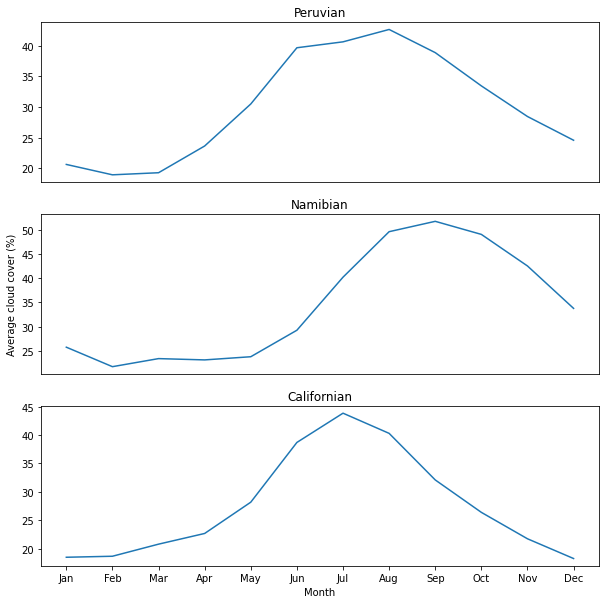

In [19]:
months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
f = plt.figure(figsize = (10,10))
kernelsize = 1
f.add_subplot(3, 1, 1)
plt.plot(movingaverage(cloud_averages['per'], kernelsize))
plt.title('Peruvian')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
f.add_subplot(3, 1, 2)
plt.plot(movingaverage(cloud_averages['nam'], kernelsize))
plt.title('Namibian')
plt.ylabel('Average cloud cover (%)')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
f.add_subplot(3, 1, 3)
plt.plot(movingaverage(cloud_averages['cal'], kernelsize))
plt.title('Californian')
plt.xticks(np.arange(12), months)
plt.xlabel('Month')

In [18]:
def movingaverage(interval, window_size): 
    interval = np.asarray(interval) 
    window = np.ones(int(window_size))/float(window_size) 
    return np.convolve(interval, window, 'same')

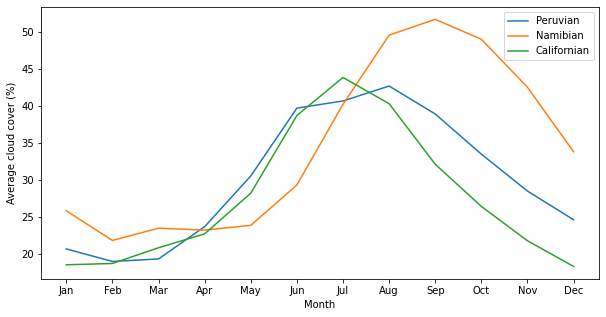

In [20]:
months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
f = plt.figure(figsize = (10,5))
kernelsize = 1
Peruvian, = plt.plot(movingaverage(cloud_averages['per'], kernelsize))
Namibian, = plt.plot(movingaverage(cloud_averages['nam'], kernelsize))
Californian, = plt.plot(movingaverage(cloud_averages['cal'], kernelsize))
plt.ylabel('Average cloud cover (%)')
plt.xticks(np.arange(12), months)
plt.xlabel('Month')
plt.legend(handles=[Peruvian, Namibian, Californian], labels=['Peruvian', 'Namibian', 'Californian'])


def movingaverage(interval, window_size):
    interval = np.asarray(interval)
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

Text(0.5, 0, 'Month')

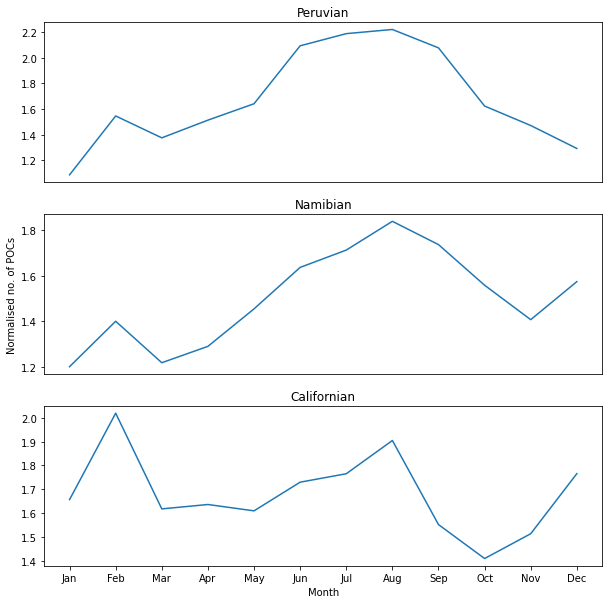

In [21]:
months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
f = plt.figure(figsize = (10,10))
kernelsize = 1
f.add_subplot(3, 1, 1)
plt.plot(movingaverage(time_dist_mean['peruvian'], kernelsize))
plt.title('Peruvian')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
f.add_subplot(3, 1, 2)
plt.plot(movingaverage(time_dist_mean['namibian'], kernelsize))
plt.title('Namibian')
plt.ylabel('Normalised no. of POCs')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
f.add_subplot(3, 1, 3)
plt.plot(movingaverage(time_dist_mean['californian'], kernelsize))
plt.title('Californian')
plt.xticks(np.arange(12), months)
plt.xlabel('Month')


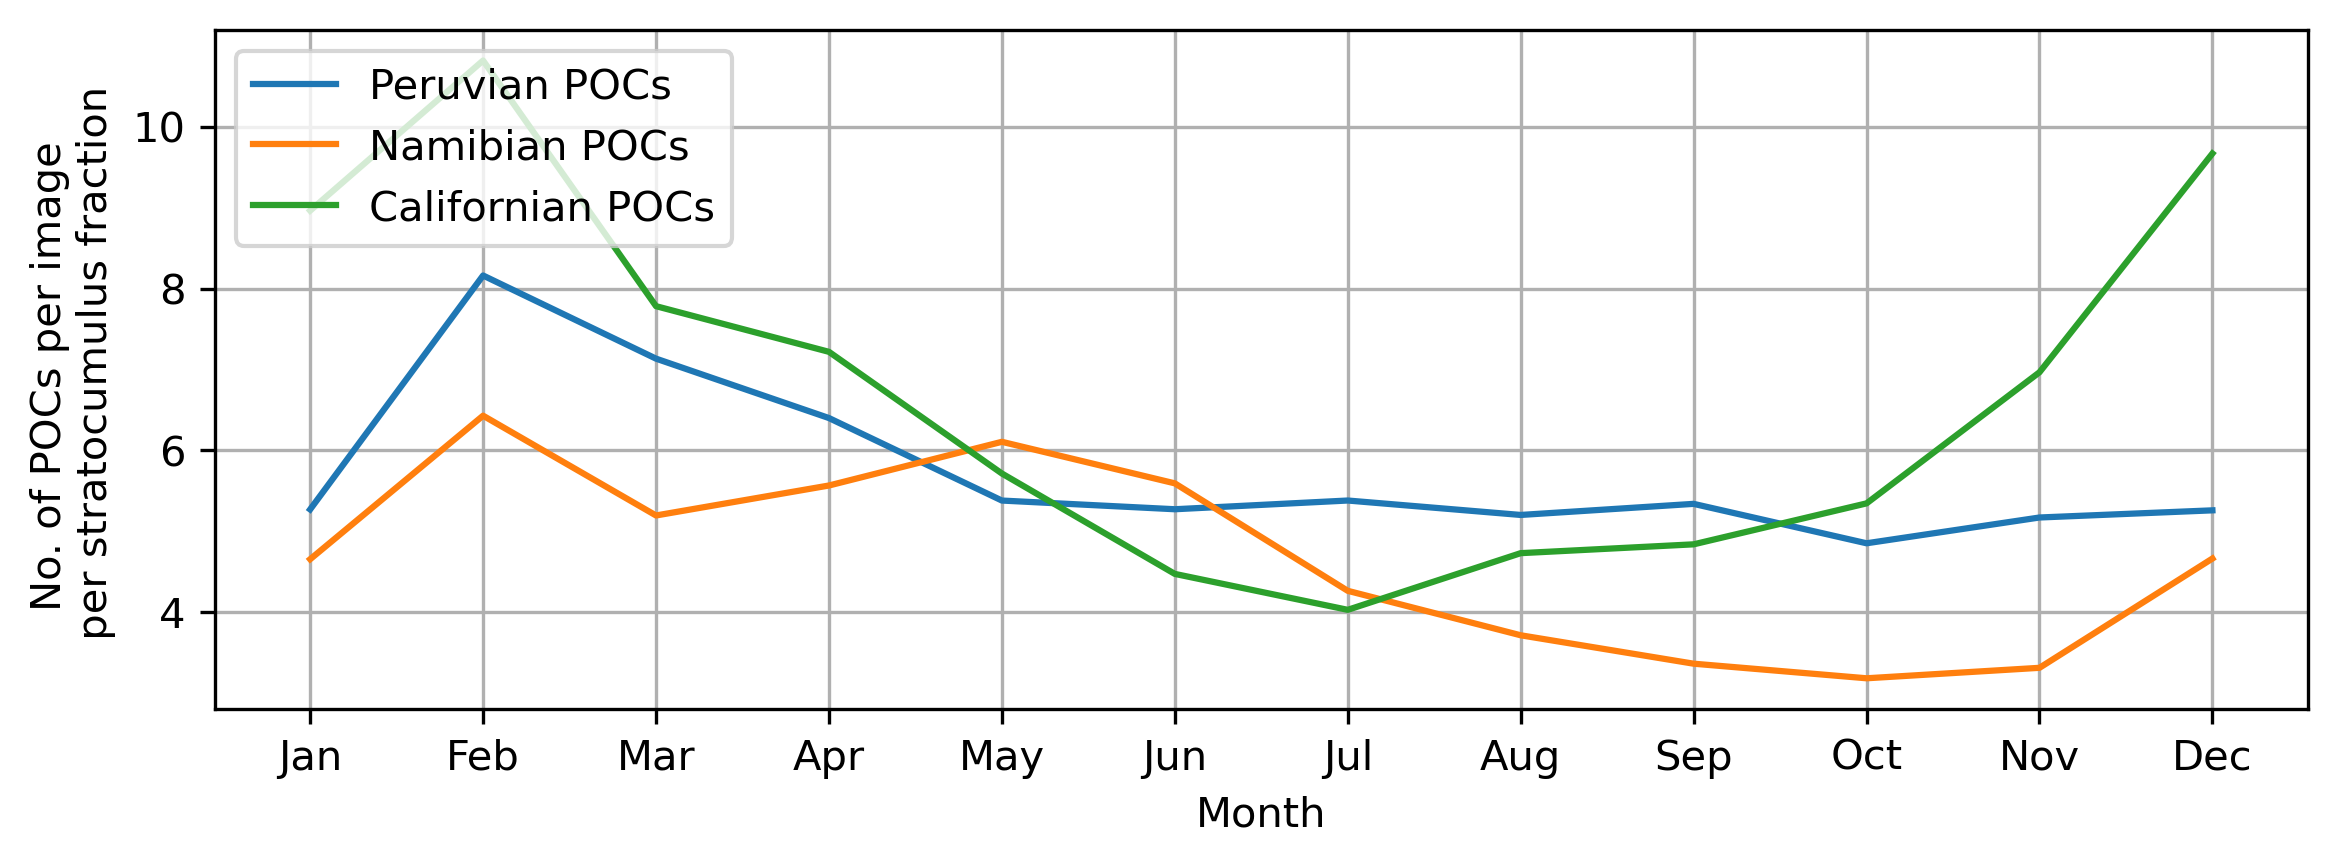

In [27]:
months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
f = plt.figure(figsize = (9,3), dpi=300)
kernelsize = 1
Peruvian, = plt.plot(movingaverage(time_dist_norm['peruvian'], kernelsize))
Namibian, = plt.plot(movingaverage(time_dist_norm['namibian'], kernelsize))
Californian, = plt.plot(movingaverage(time_dist_norm['californian'], kernelsize))
plt.ylabel('No. of POCs per image \n per stratocumulus fraction')
#plt.twinx()
#Peruvian_cld, = plt.plot(movingaverage(cloud_averages['per'], kernelsize), ls= ':')
#Namibian_cld, = plt.plot(movingaverage(cloud_averages['nam'], kernelsize), ls= ':')
#Californian_cld, = plt.plot(movingaverage(cloud_averages['cal'], kernelsize), ls= ':')
#plt.ylabel('Average cloud cover (%)')
plt.xticks(np.arange(12), months)
plt.xlabel('Month')
plt.legend(handles=[Peruvian, Namibian, Californian], labels=['Peruvian POCs', 'Namibian POCs', 'Californian POCs'], loc='upper left')
plt.grid(b=True)
#plt.legend(handles=[Peruvian, Namibian, Californian, Peruvian_cld, Namibian_cld, Californian_cld], labels=['Peruvian POCs', 'Namibian POCs', 'Californian POCs', 'Peruvian cloud amount', 'Namibian cloud amount', 'Californian cloud amount'])



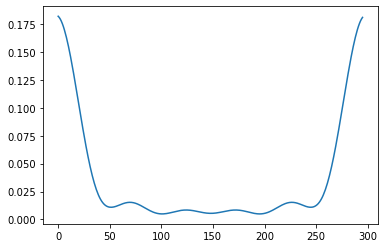

In [23]:
kernelsize=300
freq = np.abs(np.fft.fft(movingaverage(time_dist_mean['peruvian'], kernelsize)))
plt.plot(freq[2:-2])

In [24]:
year_dist = {}
year_dist_count = {}
year_dist_mean = {}
year_dist['peruvian'] = [0]*14
year_dist['namibian'] = [0]*14
year_dist['californian'] = [0]*14

year_dist_count['peruvian'] = [0]*14
year_dist_count['namibian'] = [0]*14
year_dist_count['californian'] = [0]*14

year_dist_mean['peruvian'] = [0]*14
year_dist_mean['namibian'] = [0]*14
year_dist_mean['californian'] = [0]*14
test=[]
for filename in filenames_list:
    place = filename.split('/')[1]
    year = int(filename.split('.')[1][1:5])-2005
    year_dist[place][year] += poc_database[filename]['poc_no']
    year_dist_count[place][year] += 1

for i in range(14):
    for key, value in year_dist.items():
        if year_dist_count[key][i] != 0:
            year_dist_mean[key][i] = year_dist[key][i]/year_dist_count[key][i]


Text(0.5, 0, 'Year')

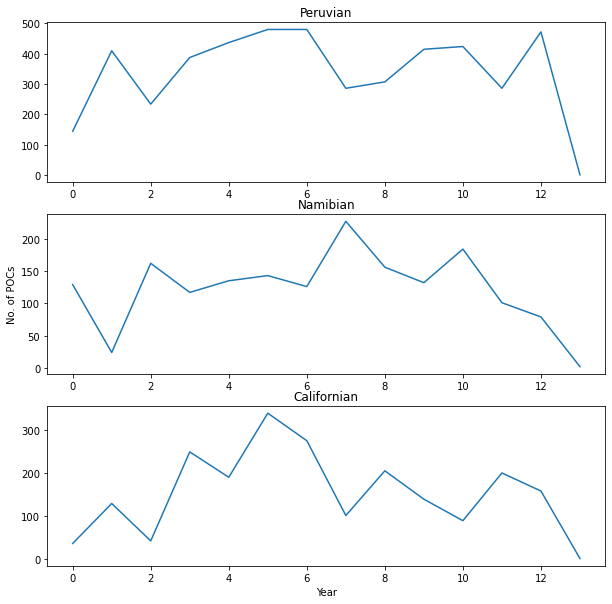

In [25]:
f = plt.figure(figsize = (10,10))
kernelsize = 1
f.add_subplot(3, 1, 1)
plt.plot(year_dist['peruvian'])
plt.title('Peruvian')
f.add_subplot(3, 1, 2)
plt.plot(year_dist['namibian'])
plt.title('Namibian')
plt.ylabel('No. of POCs')
f.add_subplot(3, 1, 3)
plt.plot(year_dist['californian'])
plt.title('Californian')
plt.xlabel('Year')